# TP 01 - 02

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load Dataset

In [2]:

# mnist = datasets.fetch_openml("mnist_784")
# X = mnist.data[:50]
# y = mnist.target[:50]



In [3]:
mnist = pd.read_csv('./dataset/mnist_784.csv')
mnist
X = mnist.drop(labels='class', axis=1)
y = mnist['class']

6


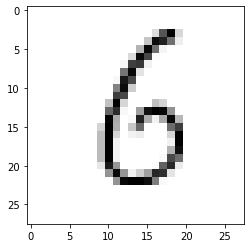

In [4]:
sample_idx = 18
print(y[sample_idx])
sample_image = X.iloc[sample_idx, :].values.reshape(28, 28)
plt.imshow(sample_image, cmap='binary')

/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


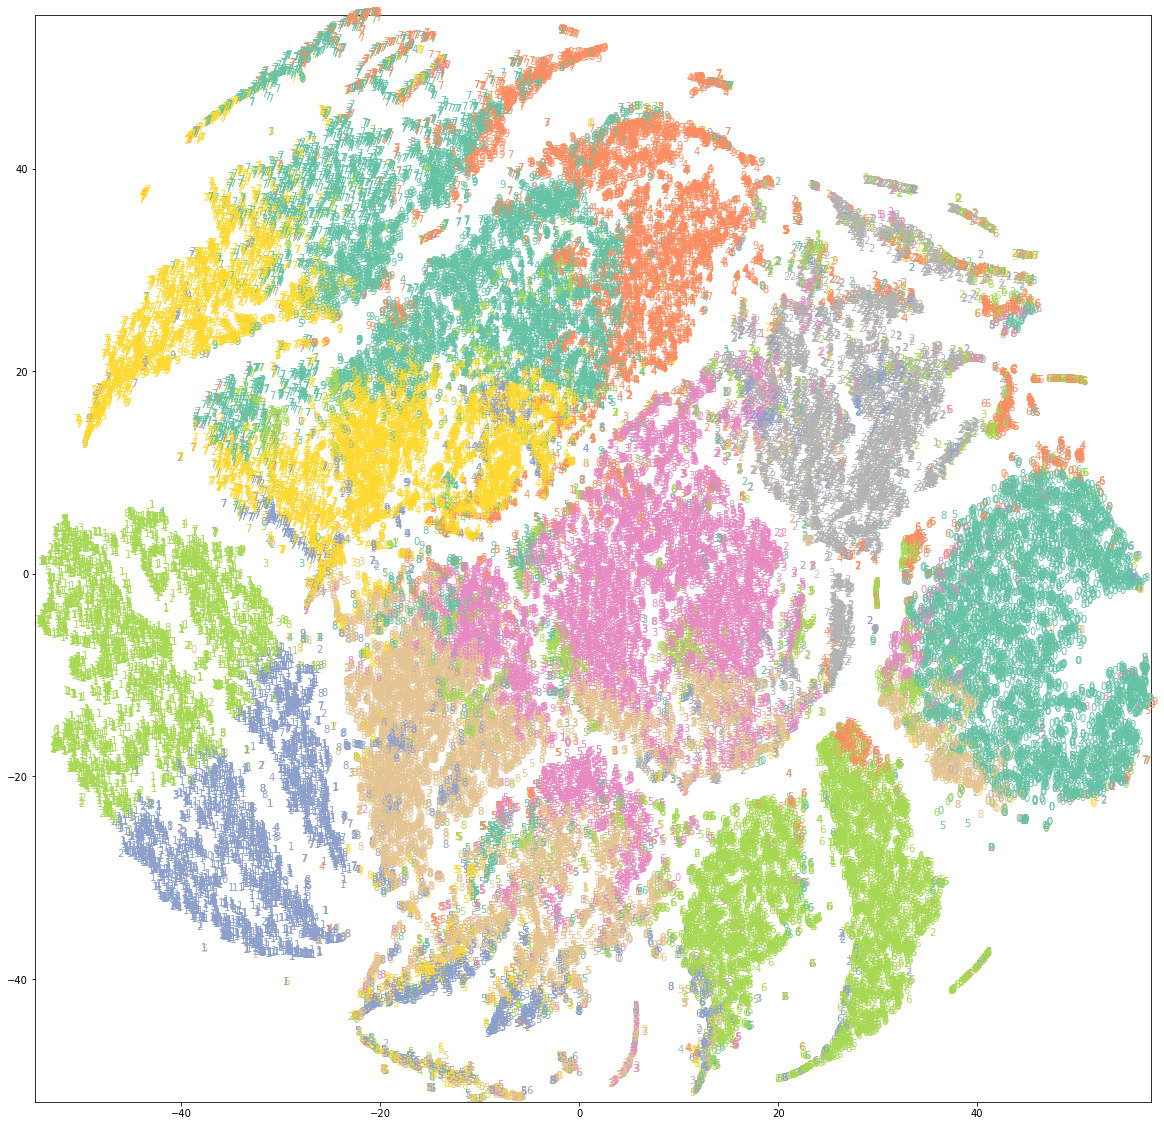

Silhouette Coefficient: 0.056
Adjusted Rand Index: 0.362


In [5]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

# 1. Choisissons le clustering avec kmeans 
from sklearn import cluster
myclust = cluster.KMeans(n_clusters=10)
myclust.fit(X)

# 2. Visualisation
# On commence par réduire la dimension des données avec tSNE. On scale d’abord les données :
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Puis on applique tSNE aux données scalées :
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
X_trans = tsne.fit_transform(X_scaled)

# Puis on visualise, selon la méthode donnée dans le coup de pouce :
from matplotlib import pyplot as plt # Dans Jupyter : % pylab inline
plt.figure(figsize=(20,20))
for i in range(X.shape[0]): # pour chaque point
    plt.text(X_trans[i, 0], X_trans[i, 1], str('%d' % y[i]),
            color=plt.cm.Set2(myclust.labels_[i]/10.))

# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(X_trans[:, 0]), np.max(X_trans[:, 0])])
plt.ylim([np.min(X_trans[:, 1]), np.max(X_trans[:, 1])])

# On affiche l'image
plt.show()

# 3. Évaluation
# Pour l’évaluation intrinsèque, je choisis le coefficient de silhouette :
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, myclust.labels_))

# Pour la comparaison aux étiquettes, je choisis l’indice de Rand ajusté :
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y, myclust.labels_))


In [7]:
myclust.score(X, y)

-178432749967.67514

## Model

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [6]:
# normalize input data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Dimension Reduction

In [7]:
from sklearn.decomposition import PCA
pca = PCA(0.70) #trying to achieve 95% of explained variance
pca.fit(X_train_std)

PCA(n_components=0.7)

In [9]:
pca.n_components_

96

In [10]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.05691181 0.0407618  0.03759917 0.02920185 0.02527747 0.02200105
 0.01933646 0.01763503 0.01539845 0.01406186 0.01353404 0.01212657
 0.01118133 0.0109792  0.01032856 0.01003654 0.00937886 0.00925772
 0.0089691  0.0087151  0.00828851 0.00801473 0.0076774  0.00746538
 0.00720177 0.00696463 0.00689    0.00663108 0.00629628 0.00618088
 0.00604389 0.00593511 0.00573156 0.00570582 0.00565597 0.00557979
 0.00539147 0.00533936 0.00518743 0.00513531 0.00486562 0.00477711
 0.00474067 0.00458926 0.00451816 0.004502   0.00442035 0.00440655
 0.00433564 0.00432475 0.00419394 0.00406912 0.00401697 0.00394568
 0.00390414 0.00387395 0.00377332 0.00371398 0.00369281 0.00365759
 0.00356042 0.00349336 0.00348455 0.0034785  0.00341802 0.00337967
 0.00332742 0.00323478 0.00321077 0.00317549 0.00315328 0.00311547
 0.00309258 0.00305374 0.00300273 0.00297286 0.00295462 0.00293148
 0.00289627 0.00287001 0.00286403 0.00284909 0.00281509 0.00280395
 0.00280117 0.00278623 0.00277714 0.00275264 0.00271062 0.0026

### Choose and train model

In [11]:
# use pca for our data sets

X_train = pca.transform(X_train_std)
X_test = pca.transform(X_test_std)


#### LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)

/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
logisticRegr.score(X_test, y_test)

0.9126428571428571

#### KMeans

In [18]:
# avec kmeans
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=10, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km.fit(X_train, y_train)

KMeans(n_clusters=10, random_state=0)

In [19]:
km.score(X_test, y_test)

-8031062.477406359

## Visualization

In [17]:
# avec t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=10)